# Receptive Field and Gabor Fitting

We first load the data.

In [1]:
%cd ..

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.receptive_field.rf import ReceptiveField
from src.spikeloader import SpikeLoader

%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()

/Users/chaichontat/Documents/GitHub/janelia2020


In [2]:
path = 'data/superstim32.npz'

Text(0.5, 0.98, 'Example Images')

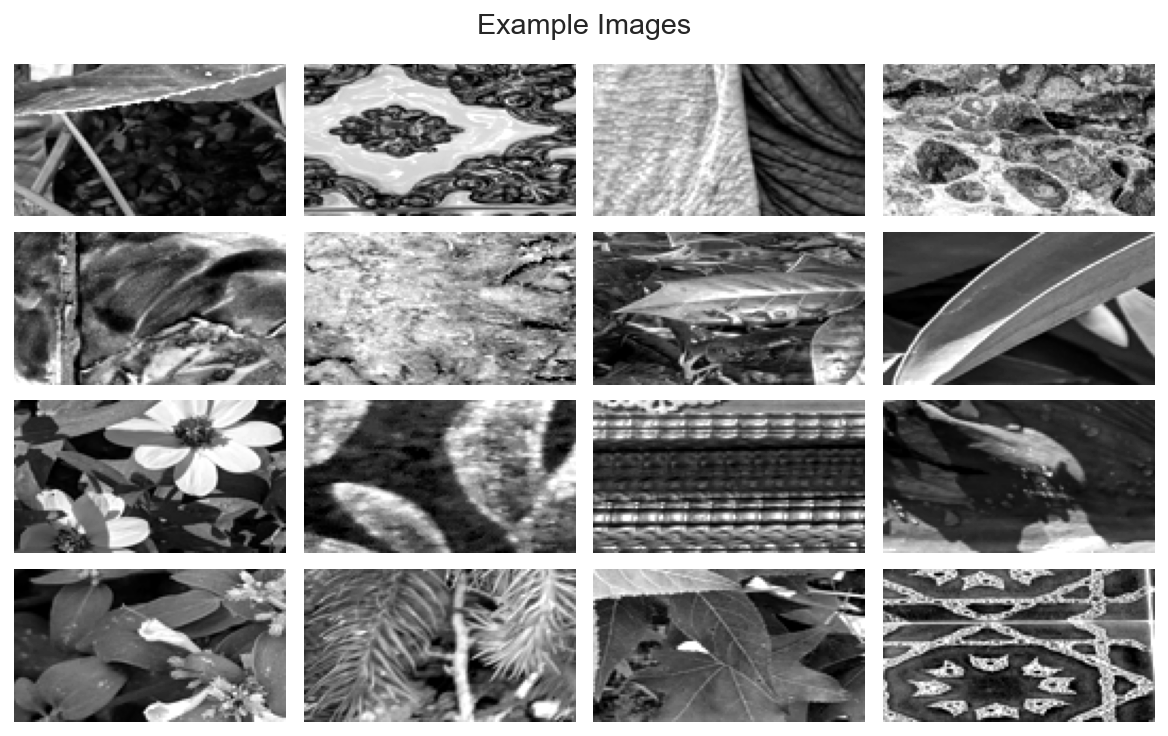

In [3]:
s = SpikeLoader.from_npz(path=path, img_scale=1)
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 5), constrained_layout=True)
axs = axs.flatten()

idx = np.random.RandomState(344).choice(np.arange(s.imgs.shape[0]), len(axs))
for i, ax in enumerate(axs):
    ax.imshow(s.imgs[idx[i]], cmap='gray')
    ax.grid(0)
    ax.axis('off')
fig.suptitle('Example Images')

### Generate RFs for the first 50 principal components.

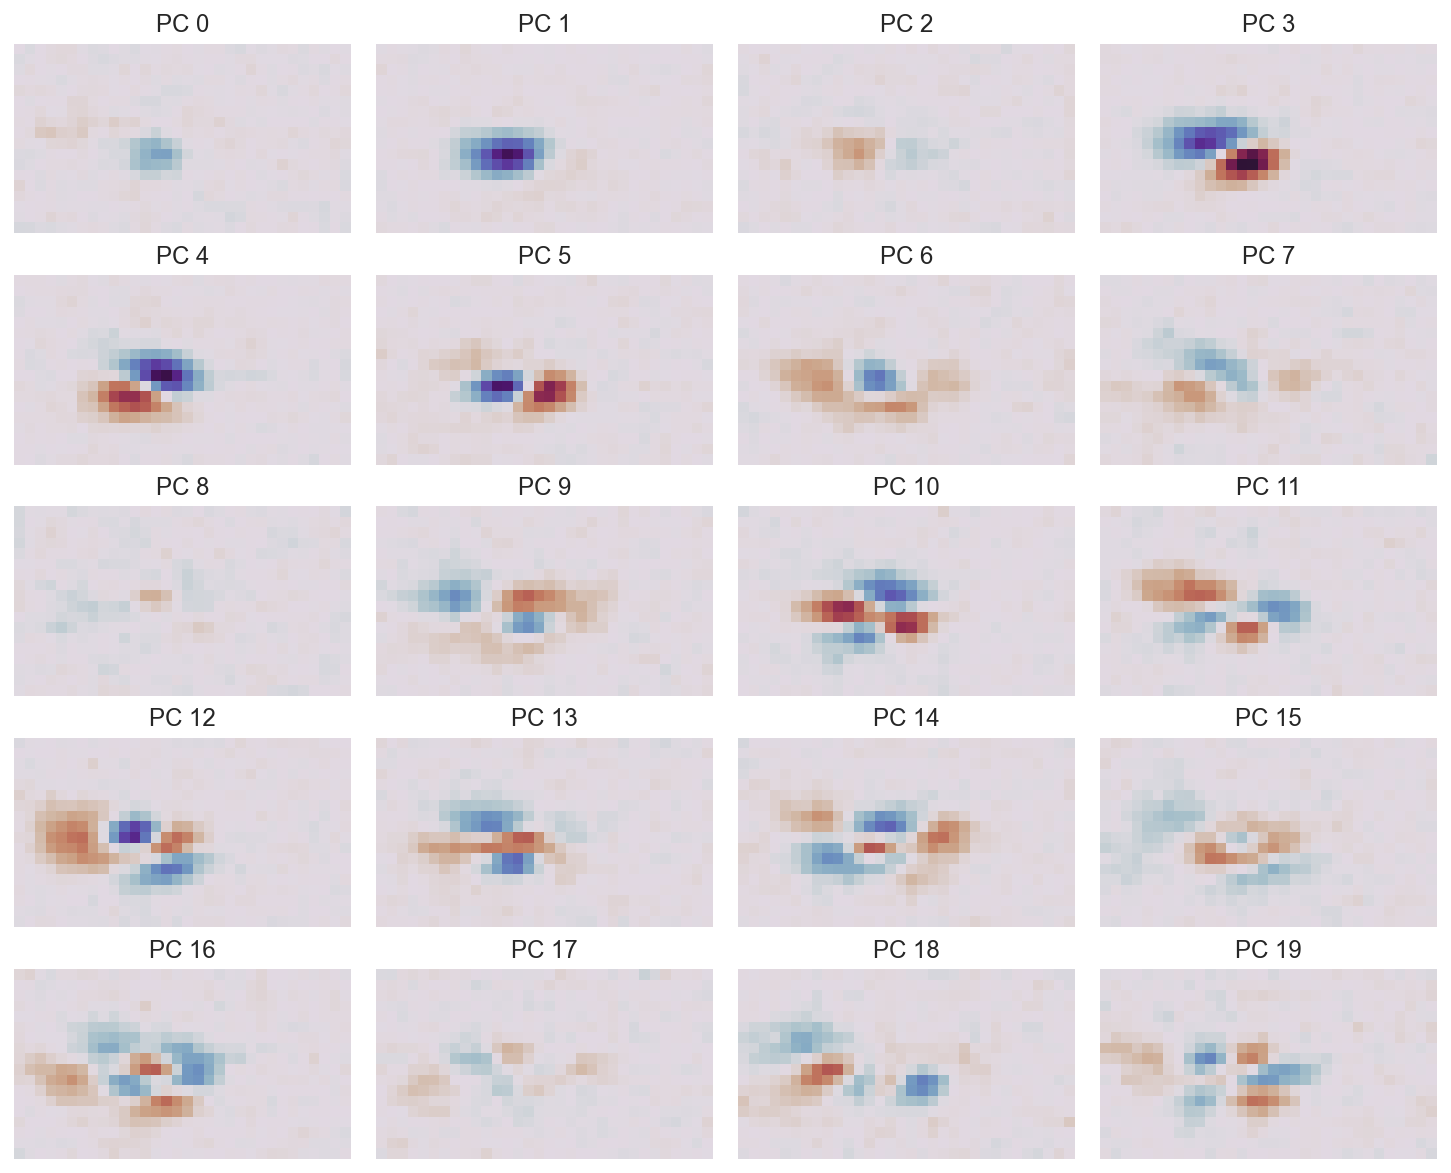

In [4]:
loader = SpikeLoader.from_npz(path, img_scale=0.25)
rf = ReceptiveField(loader.img_dim)
B = rf.fit_pc(loader.imgs_stim, loader.S, n_pc=30)
rf.plot(dpi=None)

### Generate RFs for every neuron.

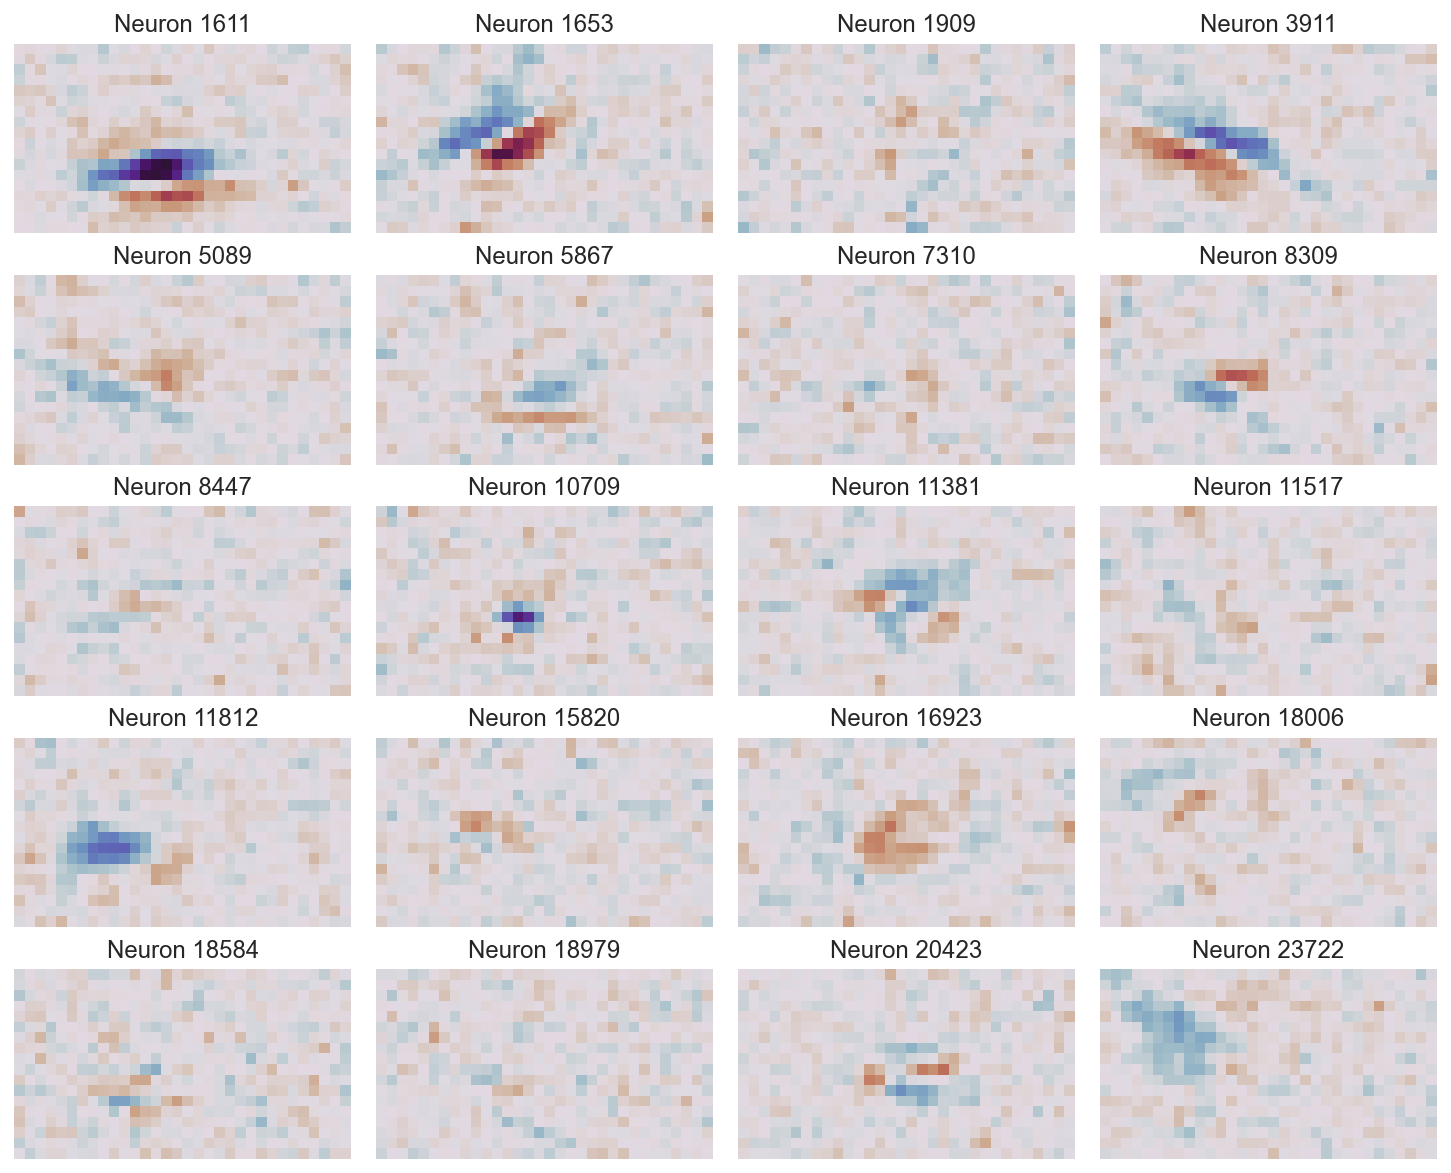

In [5]:
rf = ReceptiveField(loader.img_dim)
B = rf.fit_neuron(loader.imgs_stim, loader.S)
rf.plot(dpi=None, random=True)